In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import tikzplotlib

In [4]:
linear = pd.read_csv('linear.csv')
luigi = pd.read_csv('luigi.csv')
parallel_c = pd.read_csv('parallel-circuit.csv')
linear_c = pd.read_csv('singlecore-circuit.csv')

In [5]:
linear

,n_inputs,example,avg,run_1,run_2,run_3,run_4,run_5
0,1,linear,0.185249,0.195935,0.170365,0.168697,0.200208,0.191040
1,10,linear,1.749118,1.604498,1.676694,1.869441,1.697588,1.897371
2,100,linear,15.181053,15.181053,NaN,NaN,NaN,NaN
3,1000,linear,149.227024,149.227024,NaN,NaN,NaN,NaN
4,2000,linear,326.646425,325.882114,327.410735,NaN,NaN,NaN


In [106]:
def plot(d1, d2, filename):
    d1_label = d1['example'].unique()[0]
    d2_label = d2['example'].unique()[0]
    plt.plot(d2['n_inputs'], d2['avg'], label=d2_label, marker='x')
    plt.plot(d1['n_inputs'], d1['avg'], label=d1_label, marker='x')
    
    plt.ylabel('Runtime (s)')
    plt.xlabel('Number of inputs')
#     plt.yscale('log')
#     plt.xscale('log')
    plt.legend()
    tikzplotlib.save(filename)

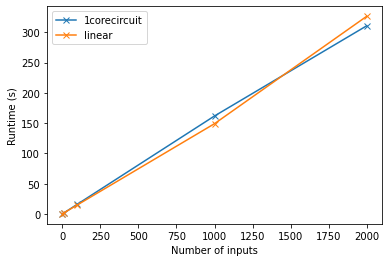

In [107]:
plot(linear, linear_c, 'linear_vs_linear_c.tex')

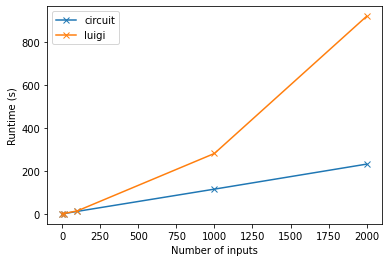

In [108]:
plot(luigi, parallel_c, 'luigi_vs_parallel_c.tex')

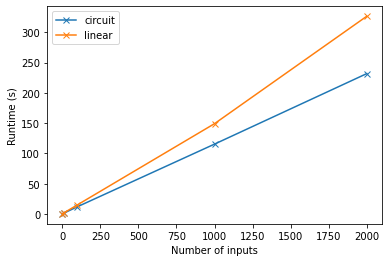

In [109]:
plot(linear, parallel_c, 'linear_vs_parallel_c.tex')

In [96]:
def speedup(d1, d2, filename):
    d1_label = d1['example'].unique()[0]
    d2_label = d2['example'].unique()[0]
    plt.bar(d1['n_inputs'].apply(str), d2['avg']/d1['avg'])
    print((d2['avg']/d1['avg']).mean())
#     plt.plot(d2['n_inputs'], d2['avg'], label=d2_label, marker='x')
    plt.ylabel('Speedup')
    plt.xlabel('Number of inputs')
#     plt.legend()
    tikzplotlib.save(filename)

1.3080166811200515


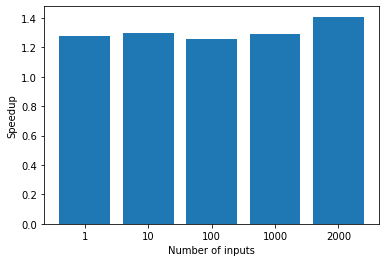

In [97]:
speedup(parallel_c, linear, 'parallel_speedup.tex')